In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [45]:
age = np.array([21,20,22,22,23,21,25,30,31])#independent features
income = np.array([60,55,60,61,65,62,65,70,68])#dependent features

In [46]:
df = pd.DataFrame({'AGE':age,'INCOME_k':income})
df

,AGE,INCOME_k
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65
5,21,62
6,25,65
7,30,70
8,31,68


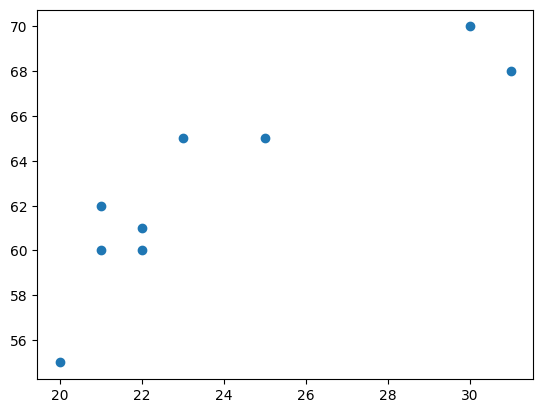

In [47]:
plt.scatter(age,income)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN_reg = KNeighborsClassifier(n_neighbors=3)
KNN_reg


KNeighborsClassifier(n_neighbors=3)

In [49]:
KNN_reg.fit(df[['AGE']],df['INCOME_k'])

KNeighborsClassifier(n_neighbors=3)

In [50]:
Knn_predict = KNN_reg.predict([[22]])
Knn_predict

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([60])

In [54]:
knn_score = KNN_reg.score(df[['AGE']],df['INCOME_k'])
knn_score

0.3333333333333333

KNN manual calculation


In [55]:
age = np.array([21, 20, 22, 22, 23, 21, 25, 30, 31])
income_K = np.array([60, 55, 60, 61, 65, 62, 65, 70, 68])

age_to_predict = 22
reference_point = (age_to_predict, 0)  # Use (22, 0) as a placeholder for the distance calculation
k = 3

def euclidean_distance(p1, p2):
    
    squared_differences = np.sum((np.array(p1) - np.array(p2)) ** 2)
    return np.sqrt(squared_differences)

# Calculate the distances from the reference point to each data point using age only
distances = []
for point in zip(age, income_K):
    distance = euclidean_distance((age_to_predict,), (point[0],))
    distances.append(distance)

sorted_data = sorted(zip(distances, age, income_K), key=lambda x: x[0])

# Select the top k nearest neighbors
nearest_neighbors = sorted_data[:k]

# Extract the ages and incomes of the nearest neighbors
neighbor_incomes = [income for _, _, income in nearest_neighbors]

# Predict the income by averaging the incomes of the nearest neighbors
predicted_income = np.mean(neighbor_incomes)

print("Nearest neighbors for age 22:", [(a, inc) for _, a, inc in nearest_neighbors])
print("Predicted income for age 22:", predicted_income)

Nearest neighbors for age 22: [(22, 60), (22, 61), (21, 60)]
Predicted income for age 22: 60.333333333333336


Linear Reg test

In [56]:
from sklearn.linear_model import LinearRegression
L_reg = LinearRegression()

In [58]:
L_reg.fit(df[['AGE']],df['INCOME_k'])

LinearRegression()

In [59]:
Linear_reg_predict=L_reg.predict([[22]])
Linear_reg_predict


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.97068966])

In [64]:
L_score = L_reg.score(df[['AGE']],df['INCOME_k'])
L_score

0.7870258620689655

In [65]:
age_to_predict = 22

# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'Age': [age_to_predict],  # Making a list with one element to match the length of other columns
    'Income_K': [None],  # Actual income is not provided for the given age
    'KNN_Prediction': Knn_predict,
    'Linear_Regression_Prediction': Linear_reg_predict,
    'Linear_score': L_score,
    'KNN_score': knn_score,
    'Compare KNN and Linear': ['in this case Linear is better than KNN']
})

# Concatenate the original DataFrame 'df' with 'predictions_df'
df_with_predictions = pd.concat([df, predictions_df], ignore_index=True)

# Save DataFrame with predictions to Excel spreadsheet
df_with_predictions.to_excel("predictions_with_dataset.xlsx", index=False)